# 6610450871 นายชนพัฒน์ โชติกุลรัตน์ หมู่ 200

In [ ]:
import zipfile
import os
import gdown
!gdown "https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt"

zip_filename = '/content/Plant.zip'
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content')
os.remove(zip_filename)

Downloading...
From (original): https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt
From (redirected): https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt&confirm=t&uuid=3d76d066-7b2c-4a9b-984b-63607b481b2c
To: /content/Plant.zip
100% 220M/220M [00:03<00:00, 57.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

def load_images_from_paths(image_paths, target_size=(256, 256, 3)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0
        images.append(img_array)
    return np.array(images)

def load_and_label_images(dataset_dir, image_size=(256, 256,3)):
    image_list = []
    label_list = []

    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)

        if "peonies" in img_name.lower():
            image_list.append(img_path)
            label_list.append(1)  # Peonies label
        elif "rose" in img_name.lower():
            image_list.append(img_path)
            label_list.append(0)  # Rose label

    return image_list, label_list

def create_dataframe(image_list, label_list):
    data = {'image': image_list, 'label': label_list}
    df = pd.DataFrame(data)
    return df

dataset = "/content/Plant"
image_size=(256, 256,3)

image_list, label_list = load_and_label_images(dataset, image_size)

df = create_dataframe(image_list, label_list)

print(df.head())

                                   image  label
0  /content/Plant/garden_roses_00039.jpg      0
1       /content/Plant/peonies_00013.jpg      1
2  /content/Plant/garden_roses_00016.jpg      0
3       /content/Plant/peonies_00052.jpg      1
4       /content/Plant/peonies_00057.jpg      1


In [ ]:
df[df.label==1].count()

,0
image,75
label,75


In [ ]:
df[df.label==0].count()

,0
image,74
label,74


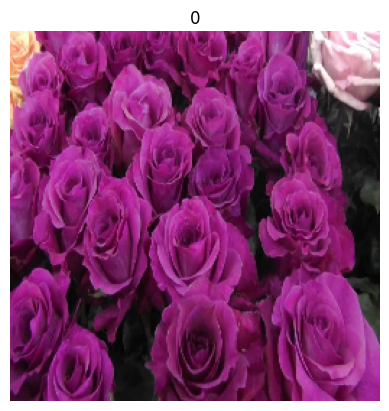

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = df[df.label==0].iloc[0].image
img = image.load_img(img_path, target_size=(256, 256,3))
img_array = image.img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.title(df[df.label==0].iloc[0].label)  # Display label as title
plt.axis("off")
plt.show()


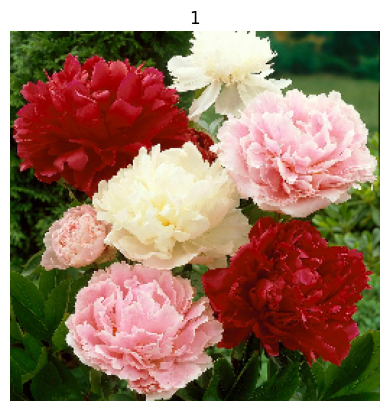

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

img_path = df[df.label==1].iloc[0].image
img = image.load_img(img_path, target_size=(256, 256,3))
img_array = image.img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.title(df[df.label==1].iloc[0].label)  # Display label as title
plt.axis("off")
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x = df.image
y = df.label
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=1)

<ipython-input-9-7e9b60d99953>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


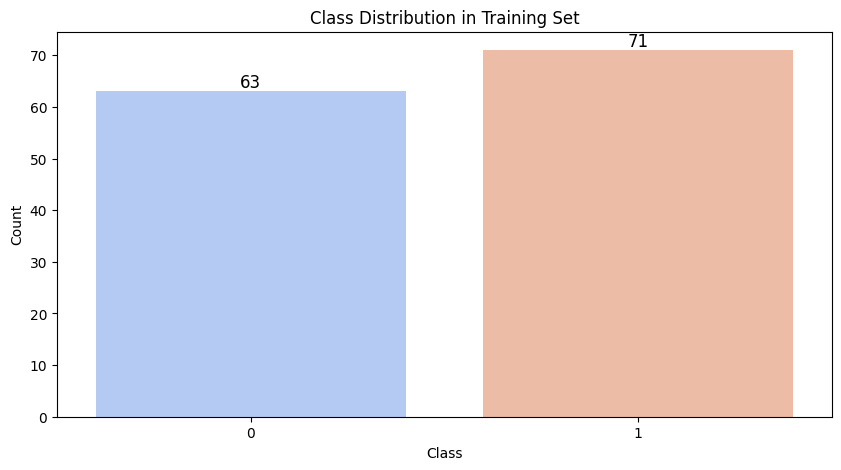

label
1    71
0    63
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(x=y_train, palette="coolwarm")

plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")


for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()),
             ha="center", va="bottom", fontsize=12)

plt.show()

print(y_train.value_counts())


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (256,256,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.compile(Adam() , loss = "binary_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 8)         │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128, 128, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,779,505 (64.01 MB)

 Trainable params: 16,779,505 (64.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

epochs = 10
batch_size = 32

In [ ]:
x_train_images = load_images_from_paths(x_train,(256,256,3))
x_val_images = load_images_from_paths(x_val,(256,256,3))
datagen.fit(x_train_images)
train_generator = datagen.flow(x_train_images, y_train, batch_size=batch_size)
val_generator = datagen.flow(x_val_images, y_val, batch_size=batch_size)

history = model.fit(
    train_generator,
    epochs=50,  # Increase epochs for better training
    validation_data=val_generator,
    steps_per_epoch=len(x_train_images) // batch_size,
    validation_steps=len(x_val_images) // batch_size,
    callbacks=callbacks  # Attach callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6413 - loss: 4.4395 - val_accuracy: 0.2667 - val_loss: 4.2730 - learning_rate: 0.0010
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5938 - loss: 3.9421

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5938 - loss: 3.9421 - val_accuracy: 0.7333 - val_loss: 0.6556 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 505ms/step - accuracy: 0.4844 - loss: 2.9139 - val_accuracy: 0.8000 - val_loss: 0.4990 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 2.1933 - val_accuracy: 0.2667 - val_loss: 0.9550 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.5352 - loss: 1.2756 - val_accuracy: 0.2667 - val_loss: 1.4656 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4062 - loss: 1.4669 - val_accuracy: 0.2667 - val_loss: 1.3506 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.4885 - loss: 1.0870 - val_accuracy: 0.4000 - val_loss: 0.8286 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5000 - loss: 0.7710 - val_accuracy: 0.4000 - val

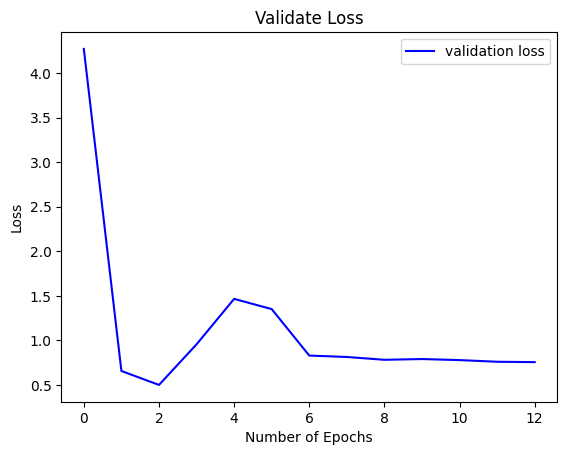

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Validate Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


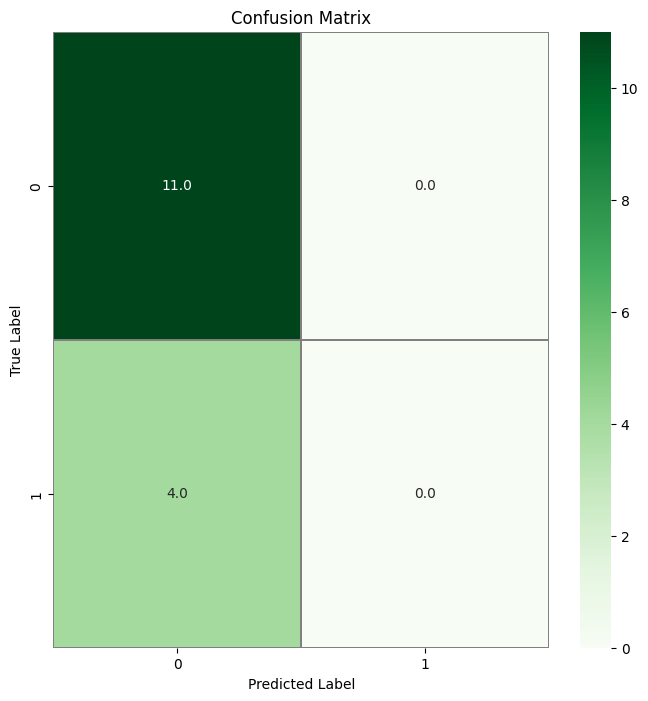

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model.predict(x_val_images)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)

# Since y_val is already in a scalar form, no need to apply np.argmax on it
y_true = y_val

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix


f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
